<a href="https://colab.research.google.com/github/RoginRobert2014/CE888/blob/main/lab4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv", header=None)
jokes_data = data.copy()
len(jokes_data)

24983

In [ ]:
# Quiz question 4
jokes_data.loc[[9146]]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
9146,100,8.69,0.19,4.85,0.78,-0.97,-9.13,2.62,4.47,0.29,7.82,4.56,0.78,-0.05,1.36,4.22,-2.04,0.73,4.03,1.84,0.24,-9.17,2.96,-0.29,3.35,1.7,0.05,-9.95,-8.5,9.22,3.59,-9.22,-3.4,0.87,-0.73,9.08,5.97,5.58,2.14,1.89,...,-9.85,9.17,-0.73,1.75,-9.85,9.08,-0.34,8.83,-5.19,-0.68,-0.63,1.65,-8.11,1.46,1.41,3.5,2.43,0.19,-2.23,-9.32,1.21,-0.44,-1.46,-3.59,2.96,-3.11,3.79,6.31,2.43,-1.99,-8.69,-3.69,2.28,4.17,4.61,5.19,1.07,-1.65,5.0,-8.64


In [ ]:
# Replace the value 99 with NaNs . This is the test set.
jokes_test_data = jokes_data.replace(99.00,np.nan)
jokes_test_data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [ ]:
# Remove the column because it doesn't contain ratings
jokes_test_data = jokes_test_data.drop(jokes_test_data.columns[0], axis=1)
jokes_test_data_org = jokes_test_data.copy()
jokes_test_data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [ ]:
# Question 4

jokes_test_data_value = jokes_data.loc[jokes_data[0]==9146]
jokes_test_data_value

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100


In [ ]:
# Use pandas to find the best- and the worst-rated jokes
mean_array = []
for i in jokes_test_data.columns:
  mean_array.append(np.mean(jokes_test_data[i]))
print(mean_array)
print(len(mean_array))
best_joke = max(mean_array)

# Answer to Quiz 3 also
print("Best joke is in column is " , np.argmax(mean_array)  , "with a value ", best_joke)
worst_joke = min(mean_array)
print("Worst joke is in column is in ", np.argmin(mean_array)  , "with a value ", worst_joke)


[0.9045733041575473, 0.20845963484381844, 0.31657433000841273, -1.4491139159405428, 0.4035564719541942, 1.5944471636238982, -0.42966247597693813, -0.6240851046795616, -0.5570308532249889, 1.3012305648494402, 1.8057967095916765, 1.4492900147170251, -1.762881790160528, 1.3963344437042027, -1.7062013052007865, -3.104818018018001, -1.1151413130504473, -0.6351034869290236, 0.15422691968932692, -0.933996797437956, 2.095625777456765, 0.8686618765455205, 0.1091923326511263, -1.6874198627117565, 0.38237269408147534, 1.286232000000005, 3.1898213138451355, 1.5188299291371237, 2.972455281944338, -0.43649274072426036, 2.198943462037635, 3.155987654320997, -1.3686476293103353, 0.8594940407178956, 3.00635059313884, 3.3125003004205738, -1.3639867306439248, 1.3004786070522285, 1.0673370883882167, 0.998634699526747, -0.3204998135024238, 1.966875330701282, -0.9248558049226209, -2.1118909562959822, 1.1086161781946084, 1.5002315343915265, 1.5595346432264716, 1.825884443008845, 2.7712978322714887, 3.6650848

In [ ]:
array = jokes_test_data.values

In [ ]:
# validation set

def replaceFn(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(array!=np.nan) 
  n_rated = len(rated[1])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

new_arr, idx = replaceFn(array, 0.1)
print(new_arr)
print(idx)

[[-7.82  8.79 99.   ...   nan   nan   nan]
 [ 4.08 -0.29  6.36 ... 99.   99.    1.07]
 [  nan 99.     nan ...   nan   nan   nan]
 ...
 [  nan   nan 99.   ...   nan   nan   nan]
 [  nan   nan   nan ...   nan   nan   nan]
 [ 2.43  2.67 -3.98 ...   nan   nan   nan]]
(array([13187, 12432,  9338, ...,  5635,  8706, 16505]), array([36, 73, 46, ..., 28, 92, 78]))


In [ ]:
print("new_arr", new_arr)
print("idx", idx)

new_arr [[-7.82  8.79 99.   ...   nan   nan   nan]
 [ 4.08 -0.29  6.36 ... 99.   99.    1.07]
 [  nan 99.     nan ...   nan   nan   nan]
 ...
 [  nan   nan 99.   ...   nan   nan   nan]
 [  nan   nan   nan ...   nan   nan   nan]
 [ 2.43  2.67 -3.98 ...   nan   nan   nan]]
idx (array([13187, 12432,  9338, ...,  5635,  8706, 16505]), array([36, 73, 46, ..., 28, 92, 78]))


In [ ]:
n_latent_factors = 2

user_ratings = jokes_test_data.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))


In [ ]:
latent_user_preferences

array([[0.404, 0.008],
       [0.222, 0.875],
       [0.524, 0.017],
       ...,
       [0.437, 0.658],
       [0.29 , 0.505],
       [0.464, 0.439]])

In [ ]:
latent_item_features

array([[0.951, 0.683],
       [0.227, 0.081],
       [0.513, 0.691],
       [0.232, 0.739],
       [0.331, 0.554],
       [0.385, 0.658],
       [0.703, 0.03 ],
       [0.553, 0.56 ],
       [0.539, 0.474],
       [0.893, 0.311],
       [0.306, 0.079],
       [0.646, 0.896],
       [0.081, 0.526],
       [0.605, 0.534],
       [0.419, 0.942],
       [0.609, 0.756],
       [0.83 , 0.39 ],
       [0.913, 0.924],
       [0.299, 0.599],
       [0.347, 0.055],
       [0.936, 0.408],
       [0.359, 0.781],
       [0.956, 0.742],
       [0.92 , 0.117],
       [0.996, 0.974],
       [0.256, 0.934],
       [0.282, 0.578],
       [0.194, 0.143],
       [0.038, 0.021],
       [0.221, 0.273],
       [0.97 , 0.249],
       [0.641, 0.943],
       [0.434, 0.318],
       [0.314, 0.103],
       [0.748, 0.884],
       [0.335, 0.227],
       [0.979, 0.342],
       [0.849, 0.835],
       [0.739, 0.141],
       [0.799, 0.309],
       [0.266, 0.037],
       [0.172, 0.265],
       [0.809, 0.124],
       [0.4

In [ ]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10000) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/10:	MSE=26.120367


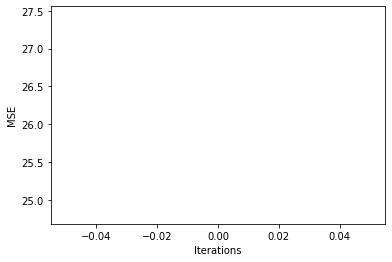

In [ ]:
num_iter = 10
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10000), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [ ]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[0.705, 0.541, 0.51 , ..., 0.836, 0.282, 1.079],
       [1.002, 0.498, 0.56 , ..., 1.121, 0.604, 1.509],
       [1.617, 1.189, 1.138, ..., 1.905, 0.686, 2.472],
       ...,
       [0.954, 0.565, 0.588, ..., 1.09 , 0.507, 1.445],
       [0.901, 0.529, 0.553, ..., 1.028, 0.482, 1.365],
       [1.563, 1.028, 1.026, ..., 1.811, 0.755, 2.378]])

In [ ]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv")
comparison_data.columns = data.values

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv")
data

,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,-8.5.1,-6.75,-7.18,8.45,-7.18.1,-7.52.1,-7.43,-9.81,-9.85.1,-9.85.2,-9.37,1.5,-4.37,-9.81.1,-8.5.2,1.12,7.82,2.86,9.13,-7.43.1,2.14,-4.08,-9.08,7.82.1,5.05,4.95,-9.17,-8.4,-8.4.1,...,8.59,3.59,-6.84,-9.03.1,2.82.1,-1.36,-9.08.2,8.3.1,5.68,-4.81,99,99.1,99.2,99.3,99.4,99.5,99.6,-9.42.1,99.7,99.8,99.9,-7.72,99.10,99.11,99.12,99.13,99.14,99.15,99.16,99.17,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.00,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
2,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
3,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.00,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,-6.80,-5.73,-5.00,-8.59,0.49,-8.93,-3.69,-2.18,-2.28,-6.12,-3.01,-0.58,-2.38,-7.77,-2.23,-2.28,-5.24,-5.53,-0.68,-6.94,-3.93,-0.34,-6.60,-5.49,-1.55,-0.49,-6.21,-8.06,-5.39,...,-6.65,-2.86,-4.61,-9.42,-7.91,-9.81,-9.42,-8.98,-1.94,-6.99,-9.66,-5.19,-5.00,-4.42,-7.28,-6.50,-4.32,-6.94,-9.85,0.73,-6.21,-2.86,-7.62,-6.12,-0.29,-1.41,-3.93,-1.94,-5.68,-4.71,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24978,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,99.00,99.00,99.00,99.00,99.00,4.90,99.00,99.00,99.00,99.00,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24979,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00

In [ ]:
# Quiz
import pandas as pd

items_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CE888/labs/lab4/movies_latent_factors.xlsx', sheet_name='Items')
user_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CE888/labs/lab4/movies_latent_factors.xlsx', sheet_name='Users')

In [ ]:
# Question 6

movie_items_high = items_df['Factor15'].max()
movie_items[items_df['Factor15'] == items_df['Factor15'].max()]

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
51,604,The Matrix Reloaded (2003),0.503414,-2.00445,0.001084,-2.255945,0.882547,-0.1886,-0.235434,0.570028,-3.492897,-0.312214,0.902742,-2.063318,-1.895101,0.748458,2.120907


In [ ]:
movie_items_value = items_df.loc[items_df['Movie ID']==462]
movie_items_value

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
40,462,Erin Brockovich (2000),0.824202,0.88264,-1.028378,0.477628,1.058559,-0.309949,-1.098492,0.262145,0.223816,0.760101,-0.025786,0.133595,-0.13041,-0.146135,0.113734


In [ ]:
# Question 5

movie_items_value = user_df.loc[user_df['User']==3806]
movie_items_value

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
12,3806,-0.042344,-0.040755,-0.05572,-0.073726,0.018203,0.09194,0.123959,-0.157403,-0.020388,0.082493,0.223057,-0.040915,-0.130308,-0.021816,0.034549


In [ ]:
user_df.set_index('User', inplace=True)

In [ ]:
items_df.set_index('Movie ID', inplace=True)

In [ ]:
items_data = items_df.drop('Title', axis=1).values

In [ ]:
user_data = user_df.values

In [ ]:
def Predict_Rating(user_ID, movie_ID):
  user_list = df_users.loc[user_ID].values
  movie_list = df_items.loc[movie_ID].drop('Title').values
  return user_list.dot(movie_list)

In [ ]:
# Question 7
Predict_Rating(3878, 122)

-1.9801680405720616

In [ ]:
# Question 8
Predict_Rating(525, 664)

-0.03828289238310254